# Segmentation et Clustering

In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [69]:
df = pd.read_csv("./data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Analyse univarié

In [70]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


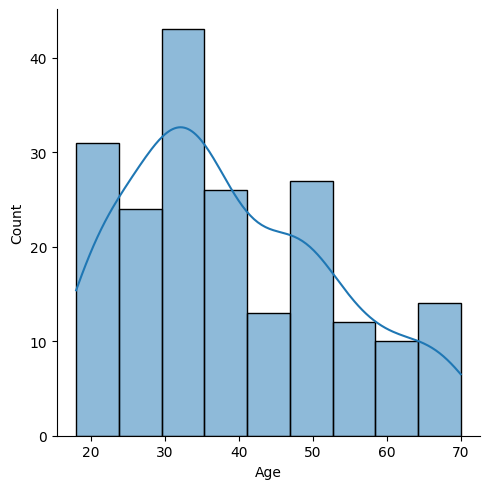

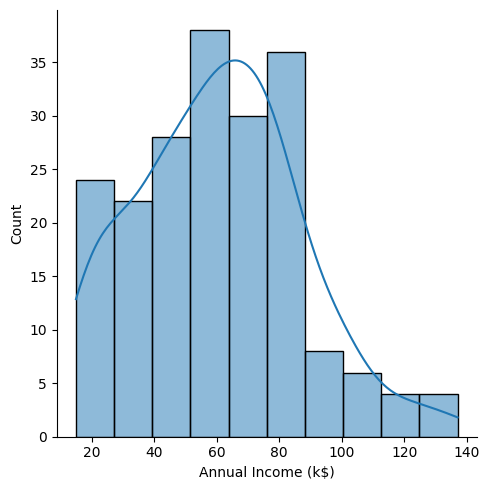

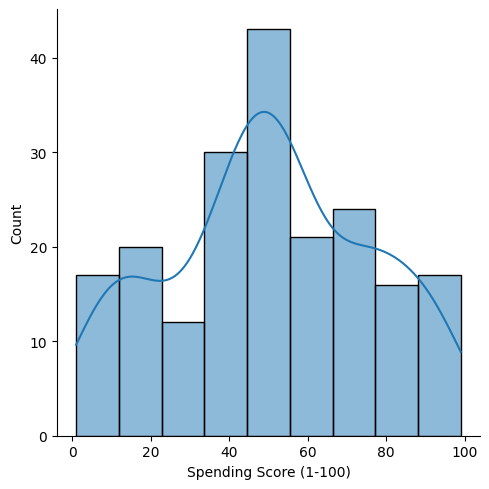

In [71]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for col in columns:
    sns.displot(df[col], kde = True)
    plt.show()

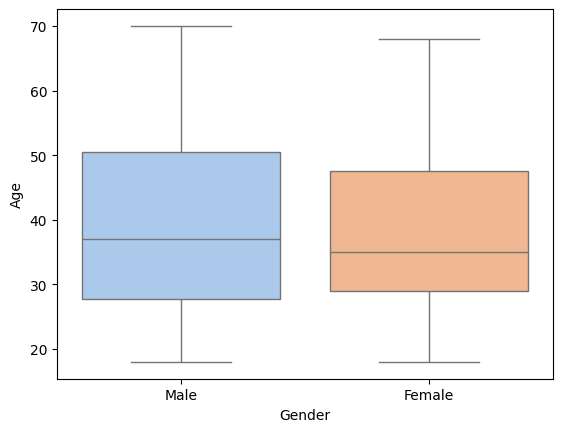

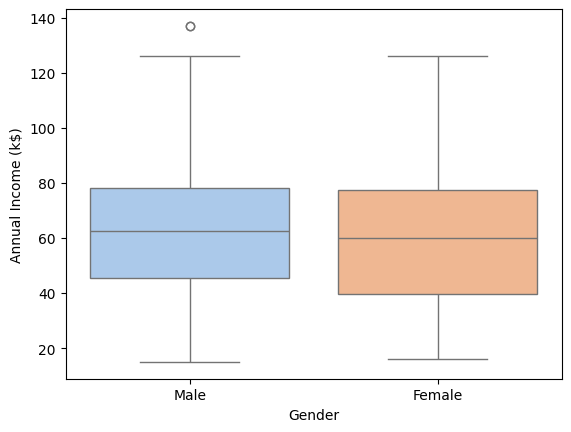

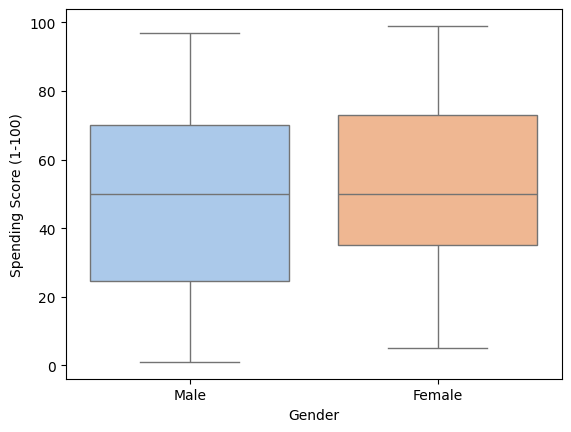

In [72]:
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x="Gender", y= df[col], hue=df.Gender, palette="pastel")

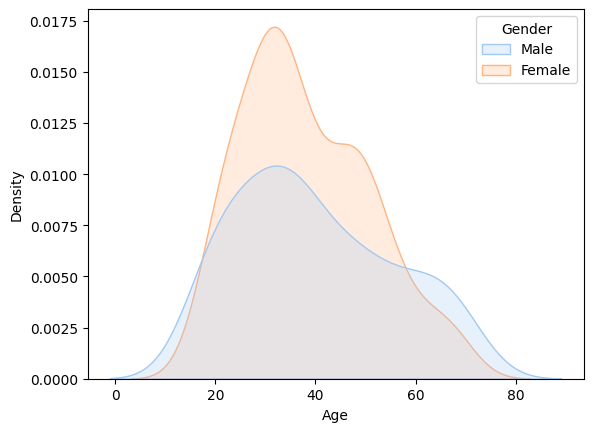

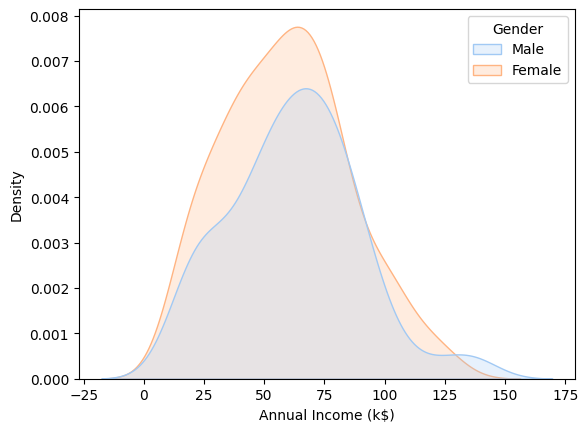

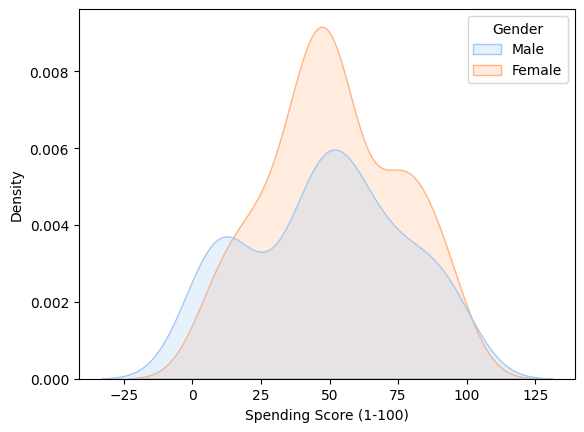

In [73]:
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[col],palette="pastel", hue=df["Gender"], fill=True)

In [74]:
df.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Analyse bivariée

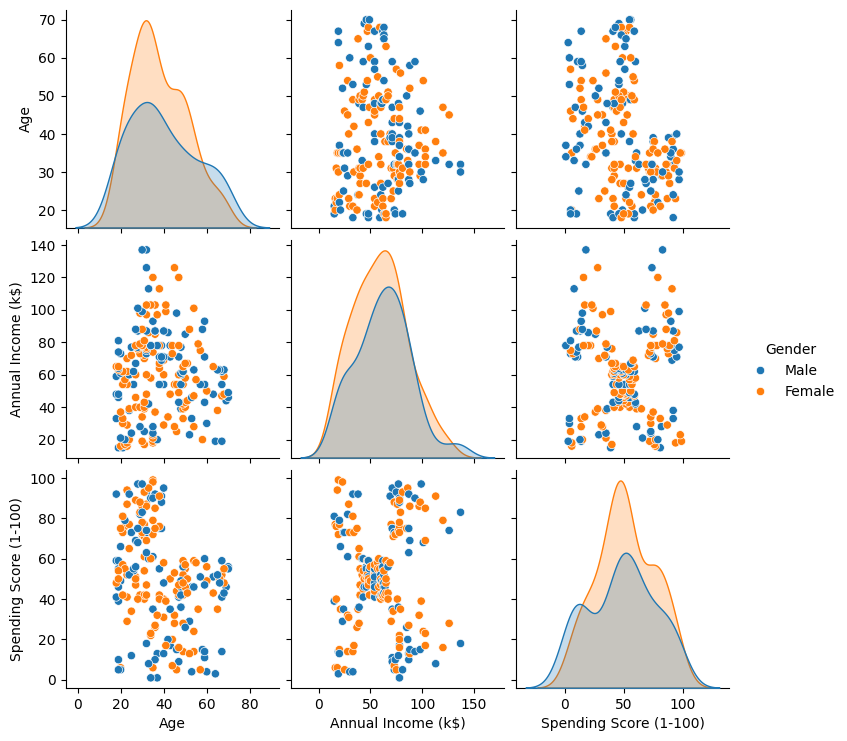

In [75]:
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")

In [76]:
df.groupby("Gender")[["Age","Annual Income (k$)", "Spending Score (1-100)"]]. mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

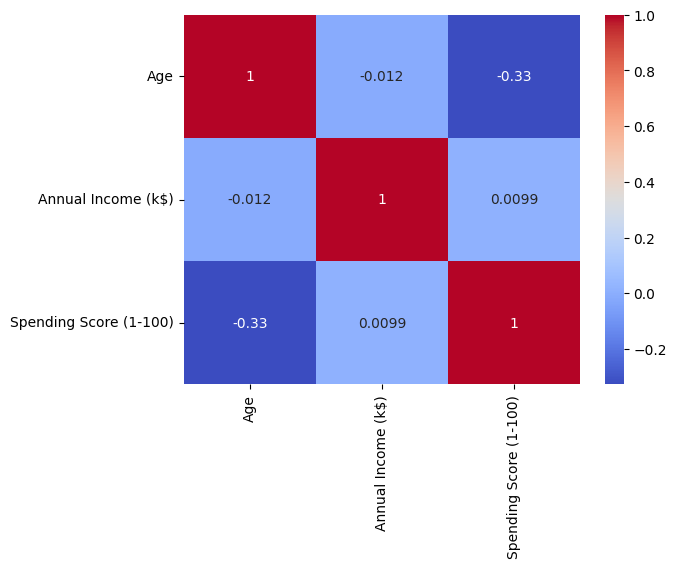

In [81]:
sns.heatmap(df.drop(["CustomerID","Gender"], axis=1).corr(), annot=True, cmap="coolwarm")